# Nonlinear dynamics of heart and brain
Authors: _TODO: insert authors and affiliations_
1. [Max Planck Institute for Dynamics and Self-Organization Göttingen](https://www.ds.mpg.de/) 

### Table of contents <a class="anchor" id="TOC"></a>
* [Introduction](#introduction)  
* [Excitable cells and the FitzHugh Nagumo model](#excitable-cells-and-fitzhugh-nagumo-model)
   * [Action Potential Generation](#action-potential-generation)
   * [The FitzHugh Nagumo Model](#the-fitzhugh-nagumo-model)
* [Cardiac Toy Model](#cardiac-toy-model)
* [Brain Toy Model](#brain-toymodel)
* [Synchronisation and Entropy Measures](#synchronisation-and-entropy-measures)
    * [Kuramoto Order Parameter](#kuramoto-order-parameter)
    * [Coherence](#coherence)
    * [Pattern Entropy](#pattern-entropy)

### Introduction <a class="anchor" id="introduction"></a>
Heart and brain are both organs that function through a collective and coordinated response of their cells, mediated by electrical signaling and activity propagation. When activated, their electrically excitable cells may activate the cells they are connected to, generating specialized activity patterns that serve their distinct functions.

However, despite these similarities in their fundamental mechanics, the emergent response is quite different: 
While healthy heart function requires regular and synchronized beating to create a regular pumping output, healthy brain function requires asynchronous activity to encode information efficiently. Interestingly, while the heart functions when the cells are locally excited in synchrony, it fails when the excitation waves become unordered; conversely, unordered activity is a feature of healthy brain dynamics, while overly strong synchronization is associated with low information capacity and epilepsy. Thus, collective dynamics that define function in one organ define failure in the other. 

Using a nonlinear dynamics perspective, both systems can be described to a leading order as excitable media. In such a system, depending on the properties of the single cells, network structure, and coupling mechanism, either non-synchronous or synchronous dynamics can emerge. Using the same equations to model cardiac and neural interactions, we show how different parameters and couplings support the distinct function of the respective organ (e.g. bidirection, spatially arranged coupling supports synchronized traveling waves). Finally, we show how pathologies in one present function in the other, using the concept of phase transitions.

## Excitable cells and FitzHugh-Nagumo model  <a class="anchor" id="Excitable-cells-and-FitzHugh-Nagumo-model"></a>
Despite vastly different functions and macroscopic organisations, the heart and brain share a common foundation: the electrical dynamics of their predominant building blocks, cardiomyocytes and neurons. 
Both rely on specialized proteins embedded into their cell membranes that control the flow of charged ions (e.g. sodium, potassium, and calcium) in the form of ion channels and ion pumps.
This flow generates electrical currents that can lead to characteristic voltage traces known as action potentials (APs)
### Action potential generation <a class="anchor" id="Action-Potential-Generation"></a>

APs serve as the fundamental units of electrical signaling in both organs, coordinating cellular activity and orchestrating organ-level functions. 
Their dynamics and generation can be described in first approximation as sharing the same key features in both organs. In the absence of external stimuli, the cell is in its resting state; the sodium-potassium pump and leak ion channels maintain the membrane potential to a negative value.

Suppose the cell receives an external stimulus crossing its excitation threshold. 
In that case, the voltage-gated sodium channels open, allowing a rapid influx of positively charged ions, depolarising the membrane. 

This depolarization slowly activates the potassium and other voltage-gated channels and inactivates the sodium channels leading to the efflux of positive ions. 
In this phase, also known as the refractory period, further stimulation is typically unable to trigger another AP. 

Finally, ionic pumps and ion exchangers restore the resting membrane potential. 

### The FitzHugh-Nagumo model  <a class="anchor" id="FitzHugh-Nagumo-Model"></a>

To model the electrical dynamics of both cardiomyocytes and neurons we employ the FitzHugh Nagumo  (FHN) model - the simplest model describing excitable units which displays and action potential shape in one of its variables following an external stimulus above threshold. 

Given an excitable cell identified by the subscript $i$, the model characterises the changes $\frac{d}{dt}$ in its membrane potential $V_i$ and one slow recovery variable $W_i$.

<a class="anchor" id="equation_1_ff"></a>
\begin{align}
    \frac{dV_i}{dt} &= a V_i (V_i-b)(1-V_i) - W + I_i + \eta_i\\
    \frac{dW_i}{dt} &= \epsilon (V_i-W_i)
\end{align}

The membrane potential $V_i$ summarises the effects of the fast ionic currents (sodium) while the recovery variable $W_i$  summarises all the slow ionic processes (ion channel inactivation/ionic restoration). 

The parameter $b$ controls the excitation threshold needed to generate an AP: the higher $b$ is, the stronger needs to be the external input to trigger activity.

 The parameter $a$ controls the sharpness and duration of the AP: as $a$ increases, the duration of the depolarisation phase increases, while the recovery period remains unchanged. 
 
 The parameter $\epsilon$ determines the timescale separation between membrane potential and recovery variable. Decreasing $\epsilon$ results in a longer overall activity, lengthening both the depolarisation phase and the recovery period. 

 $\eta_i$ is uncorrelated white noise with standard deviation $\sigma$.
 
 Finally, $I_i$ represents the external input, typically given by the coupling with other cells.

## Cardiac Toy Model <a class="anchor" id="Cardiac-Toy-Model"></a>
The heart, serving as the lifeblood of the circulatory system, pumps oxygenated blood to the body and deoxygenated blood to the lungs. 
This vital function relies on the coordinated contractions of cardiomyocytes. 
The tight local, bidirection coupling of these cells via gap junctions enables locally synchronized activation with emergent traveling waves, thereby enabling efficient pumping. 
The cell-to-cell signaling together with a long-lasting action potential (approx 200 milliseconds) and a pronounced refractory period generates a rhythmic electrical signal that sets the range of the heartbeats.

From a dynamic systems perspective, heart activity needs to be modeled considering the spatial dimension at its core. Hence, we model gap junctions between neighbouring cells with a discretised Laplacian based on a nine point stencil and we simulate as squared lattice with $N$ lattice sites per dimention. We define the input current of each cells of the FHN model $I_i$ as $I_i=-D_V \sum_{j} J_{ij}V_j$, where $D_V$ is the diffusion coefficient. 

The coupling matrix $J_{ij}$ is defined as $J_{ii}=-3$, $J_{ij}=0.5$ if j is nearest neighbour of $i$, $J_{ij}=0.25$ if $j$ is a diagonal neighbour of $i$, and $J_{ij}=0$ otherwise. 

To obtain the transition from a synchronous to an asynchronous steady state, in the cardiac toy model we simulate the presence of microfibrosis. Thus, we introduce blocking lattice sites with probability $p$ as pointwise boundaries. To obtain normal sinus rhythm we set $p=0$ 

imports

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl

import os, sys
rootpath = os.path.join(os.getcwd(), '..')
codepath = os.path.join(os.getcwd(), '../codebase') #directory where you have the class file
sys.path.append(rootpath)
sys.path.append(codepath)
from codebase.FHN_model import * 
from codebase.FHN_analysis import * 
from codebase.FHN_plots import *

We initialise the cardiac toy model by setting the **organ** parameter of the **FHN_model** class to **heart** . If the parameters $a, b, e, Dv$, and sigma are not initialised in the class declaration they are set to those used in the simulations of **LINK THE PAPER**.If not otherwise stated, N -the number of cardiomyocytes per each direction of the squared lattice- is set to 100. Moreover, $p=0$ by default. The **adjacency_seed** parameter set the seed to generate a random matrix of blocking lattice sites when $p \neq 0$. The **stimulus_time** sets the period of the sinus rhythm.

In [2]:
#initialisation of the model
heart_toymodel = FHN_model( 
                  
                 organ='heart',

                 adjacency_seed=1000,
                 stimulus_time=1300)             

In [3]:
#Integration of the model
# output_times defines the time points at which the solution is stored
# T is the final time point and is set by default to 3000
heart_toymodel.solve_with_EulerMaruyama_fori(output_times=3000)

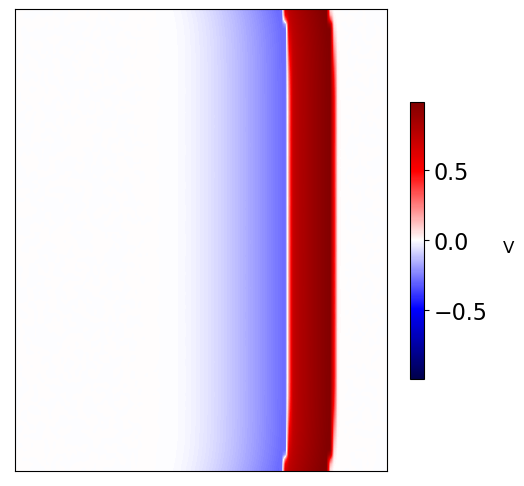

In [4]:
#Plotting one frame of the solution of the membrane potential
#t_frame is the time point at which the frame is plotted
fig1, ax1 = plt.subplots(figsize=(6, 6), facecolor='none')
heart_plot(fig1, ax1, heart_toymodel, t_frame=500)

(<matplotlib.image.AxesImage at 0x2368015baf0>,
 <matplotlib.colorbar.Colorbar at 0x23680285460>)

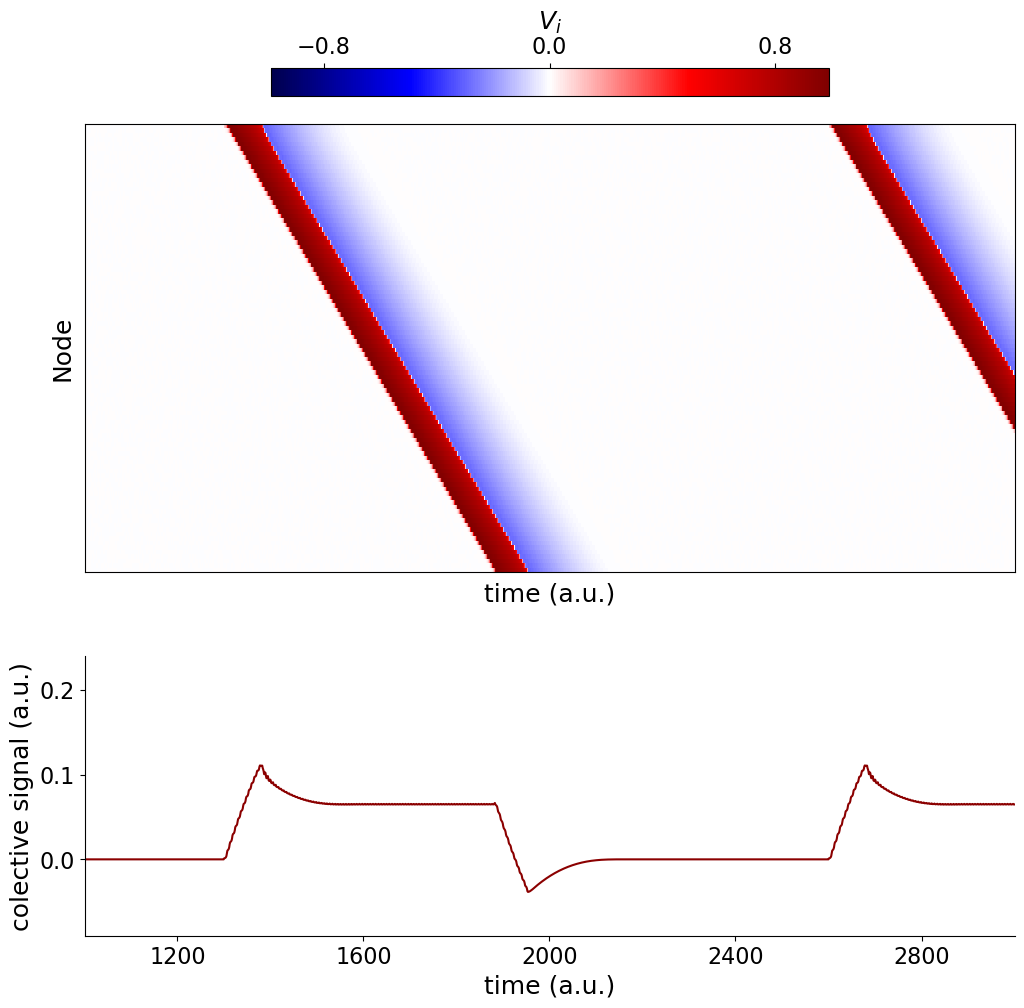

In [5]:
#Here we plot the transmission of the signal across time over one row of the grid
#t_start is the time point at which the plot starts, corresponds to the end of equilibration
#Moreover we plot the collective activity at each timestep given by \sum_i V_i
fig2 = plt.figure(figsize=(12, 12), facecolor='none')
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

axkimo = fig2.add_subplot(gs[0])
axcollective = fig2.add_subplot(gs[1])

plot_kymograph_and_collective_signal(fig2, axkimo, axcollective, heart_toymodel,t_start=1000)

## Brain Toy Model <a class="anchor" id="Brain-Toy-Model"></a>

Like the heart, the brain relies on electrically excitable cells, however, in contrast to the heart, the brain's neurons should not all be active at the same time, as this presents very low information content, and even would present an epilepsy-like state. 
Instead, the brain requires distributed, de-synchronized activation of its neurons to support complex information processing. To that end, the neurons fire very short (approx 1 millisecond) action potentials (APs) that travel via a specialized network to hundreds or thousands of other neurons - which in turn are only activated if they receive sufficient APs within a short period of time, so that the summed membrane voltages crosses the neuron's firing threshold. 
This combination of short APs, relatively long conduction delays (several milliseconds), the non-local connectivity, and the threshold function for firing all support a de-synchronized activation of the neural network. Hence, altogether, the neural network is designed for distributed, asynchronous computation.

To simulate the brain's long-range connections, we use a directed Erdos-Renyi graph of fixed mean out-degree $k$. The coupling neuron $i$ with the other neuros is set to be $\frac{m}{k} J_{ij}$ where $J_{ij}$ is the adjacency matrix of the network and $m \geq 0$ sets the strength of the excitatory connections.

The variable $m$ directly determines the system's synchronisation level and is thus varied to obtain a phase transition from the healthy (asyncronous) to pathological (synchronous) state. 



In [6]:
# model initialisation
# Once again, the parameter of the FHN model are set my default to the values used in the paper
#m , if not otherwise stated, is set to 0.005 (healthy state)
# N, if not otherwise stated, is set to 1000
# The adjacency_seed sets the seed for the erdos renyi graph generation
brain_toymodel = FHN_model( 
                  
                 organ='brain',

                 adjacency_seed=1000,
                 )  

c:\Users\pelli\Projects\perspective_heart_and_brain\notebooks\..\codebase\FHN_model.py:158: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adj_matrix = nx.adjacency_matrix(G, weight='weight')


In [7]:
#Integration of the model
# output_times defines the time points at which the solution is stored
# T is the final time point and is set by default to 3000
brain_toymodel.solve_with_EulerMaruyama_fori(output_times=3000)

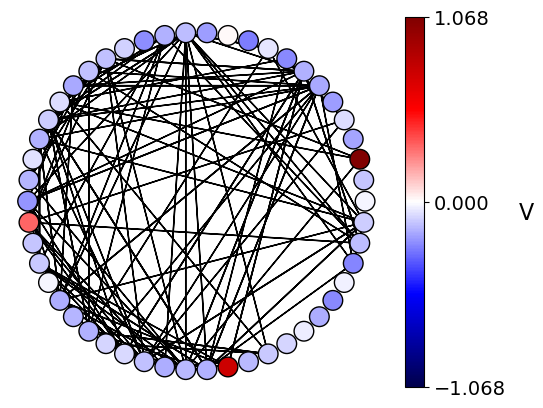

In [9]:
#Plotting one frame of the solution of the membrane potential for a subset of neurons
#t is the time point at which the frame is plotted
t=100
fig3, ax3 = plt.subplots(figsize=(6, 6), facecolor='none')
plot_graph_on_circle(brain_toymodel.vs[t,:], brain_toymodel.J, ax3)

(<matplotlib.image.AxesImage at 0x23683b9cd30>,
 <matplotlib.colorbar.Colorbar at 0x23683b81400>)

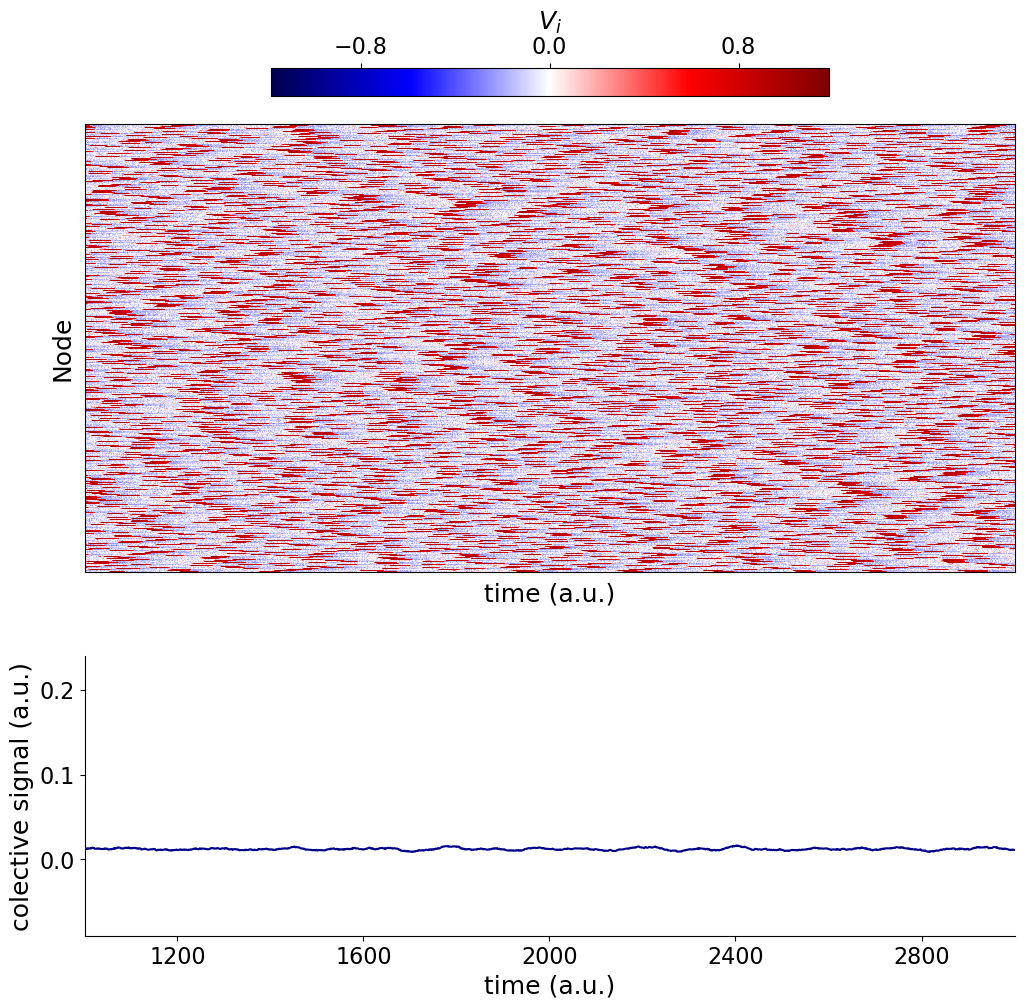

In [10]:
#Here we plot the kymograph of the membrane potential over time
#t_start is the time point at which the plot starts, corresponds to the end of equilibration
#Moreover we plot the collective activity at each timestep given by \sum_i V_i

fig4 = plt.figure(figsize=(12, 12), facecolor='none')
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

axkimo = fig4.add_subplot(gs[0])
axcollective = fig4.add_subplot(gs[1])

plot_kymograph_and_collective_signal(fig4, axkimo, axcollective, brain_toymodel)

## Synchronisation and entropy measures <a class="anchor" id="Synchronisation-and-entropy-measures"></a>

To characterise the phase transition from healthy to pathological states in both organs we employ three different order parameters:
* Kuramoto Order Parameter
* Coherence
* Pattern entropy

### Kuramoto Order Parameter <a class="anchor" id="Kuramoto-Order-Parameter"></a>

The degree of synchronisation over time is quantified using the real part of the Kuramoto order parameter
\begin{align}
r(t)e^{i \psi(t)}=\frac{1}{n}\sum_{k=1}^n e^{i \theta_k(t)}.
\end{align}
The phases $\theta_k$ are calculated from the Hilbert transform $\mathcal{H}$ of $V_k$. To calculate $\mathcal{H}[V_k]$ we take the Fourier transform of $V_k$, multiply by 2 the positive frequencies, set the negative frequencies to zero and leave unchanged the zero-frequency component. The signal thus obtained is transformed back to time space obtaining the analytic signal. The imaginary part of the latter is $\mathcal{H}[V_k]$. The instantaneous phase of the signal is extracted as  $\theta_k(t)=\arctan \left(\frac{\mathcal{H}[V_k(t)]}{V_k(t)}\right)$.


By averaging over time $r(t)$ we obtain the overall degree of synchronisation: 
$R= \left<\frac{1}{n}\sum_{k=1}^n r_k(t)\right>_t$

In the case of the cardiac toy model, for $p=0$  we expect lattice sites belonging to the same column to be perfectly synchronised. 
Indeed, they are simultaneously reached by the periodic excitation which travels horizontally. 
Hence, we quantify synchronisation column-wise obtaining: for each column $j$ we calculate $R_j=\left<\frac{1}{N}\sum_{k=1}^N r_k(t)\right>_t$ and extract the total order parameter as $R=\frac{1}{N}\sum_{j=1}^NR_j(t)$.  

In [11]:
# Calculation of the order parameter R for the heart model
# if p=0 it is close to 1 signaling maximum degree of synchronisation
#this corresponds to efficient blood pumping
# transient_time corresponds to the initial time period before equilibration
#The latter is discarded in the calculation of the order parameter
kuramoto_heart= FHN_kuramoto(heart_toymodel, transient_time=1000)
kuramoto_heart.kuramoto()
print(kuramoto_heart.R)

0.9954194


In [17]:
# Calculation of the order parameter R for the brain model
#For m=0.005 it is elevated signaling a low degree of synchronisation
# This corresponds to efficient information processing
kuramoto_brain= FHN_kuramoto(brain_toymodel, transient_time=1000)
kuramoto_brain.kuramoto()
print(kuramoto_brain.R)

0.16483305


### Coherence <a class="anchor" id="Coherence"></a>

The coherence order parameter $R_V$ is calculated to quantify the degree of synchrony of the membrane voltages $V_j$  by comparing global population fluctuations to individual variability. 

Being $\overline{V}(t)=\frac{1}{N}=\sum_{j=1}^NV_j(t)$ the population mean and denoting by $<\dots>$ the average over a time window then $R_V(t)$ is given by the ratio of the global variance of the population mean and the average variance within single sites: 
\begin{align}
    R_V(t)=\frac{\sqrt{<\overline{V}(t)^2>-<\overline{V}(t)>^2}}{\sqrt{\frac{1}{N}\sum_{j=1}^N\left(<V_j^2(t)>-<V_j(t)>^2\right)}}
\end{align}
Further averaging over time we obtain a global order parameter quantifying the degree of synchrony in the system. Concerning the heart simulation, $R_V$ is calculated column by column and then averaged in accordance with the procedure for the Kuramoto order parameter.

In [10]:
# Calculation of the coherence for the heart model
#The coherence is elevated for p=0 signaling a high degree of synchronisation
coherence_heart=FHN_coherence(heart_toymodel, transient_time=1000)

coherence_heart.coherence()
print(coherence_heart.coherence)

0.62147576


In [11]:
# Calculation of the coherence for the brain model
# The coherence is close to 0 for m=0.005 signaling a low degree of synchronisation
coherence_brain=FHN_coherence(brain_toymodel, transient_time=1000)

coherence_brain.coherence()
print(coherence_brain.coherence)

0.045171626


### Pattern Entropy <a class="anchor" id="Pattern-Entropy"></a>

We use a binary representation of the time evolution of the system to quantify entropy. 
First, we define binary activity variables $A_i(t)$ from the time evolution of each $V_i$, defining a node active when its membrane potential is larger than a threshold $V_\mathrm{thres}$ and, as a consequence, the node is in the depolarisation phase of the action potential. As $V_\mathrm{thres}$, we choose $0.08$ for the heart and $0.5$ for the brain.

Then, we consider smaller subsets of $A_i(t)$ at fixed $t$. 
For each of the subsets, we count over time the number of occurrences $n_i$ of each of the $\mathcal{N}$ possible binary patterns that it could store and define the probability of the $i^{th }$ pattern as $p_i=\frac{n_i+1}{T+\mathcal{N}}$, where $T$ is the total number of time-steps. 

This definition assumes a uniform probability distribution for the patterns which are in principle possible, but not observed, thus counteracting the bias introduced by the occurrence of only a small number of patterns. 

Finally, we quantify the uncertainty in the system by computing Shannon entropy as 

$H=-\sum_{i}p_i \log_2 (p_i)$.   

In [ ]:
# Calculation of the entropy for the heart model
# The entropy is low for p=0 signaling a high degree of synchronisation

entropy_heart=FHN_entropy(heart_toymodel, transient_time=1000)
entropy_heart.entropy()
print(entropy_heart.entropy)

0.23035547


In [13]:
# Calculation of the entropy for the brain model
# The entropy is high for m=0.005 signaling a low degree of synchronisation
entropy_brain=FHN_entropy(brain_toymodel, transient_time=1000)
entropy_brain.entropy()
print(entropy_brain.entropy)

0.65212905
